# Task 3 - Prediction using Unsupervised Machine Learning 

## Task -  For Iris Dataset Predict the optimum number of clusters and represent it visually.

## Submitted by :- Tarun Lathiya

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
# from sklearn library load iris dataset  
iris =  datasets.load_iris()

In [3]:
# iris

In [4]:
# extracting features of iris dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# extracting target of iris dataset
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head() # see the first 5 rows from dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# set up variable to find the optimum number of clusters
x = df.iloc[:,[0,1,2,3]].values
# x

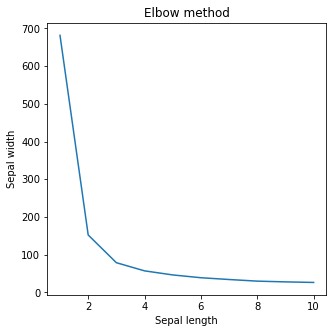

In [8]:
# finding the optimum number of clusters by using k-means clustering

from sklearn.cluster import KMeans
k_list = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    k_list.append(kmeans.inertia_)
    
# plotting the result onto graph
    
fig = plt.figure(figsize=(5,5))
plt.plot(range(1,11),k_list)
plt.title('Elbow method')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### The above graph shows that the optimum number is where elbow curve occurs.
### So here, the optimum number for iris dataset is "3". 

In [9]:
# Apply the kmeans to the dataset
# create kmeans classifier

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init = 10, random_state=0)
y_pred = kmeans.fit_predict(x)

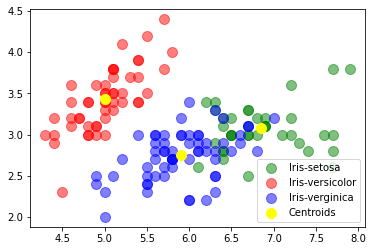

In [10]:
# Visualizing clusters on the graph 

plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s = 100, c = 'green', label = 'Iris-setosa', alpha = 0.5)
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s = 100, c = 'red', label = 'Iris-versicolor', alpha = 0.5)
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s = 100, c = 'blue', label = 'Iris-verginica', alpha = 0.5)


# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100,c = 'yellow',label = 'Centroids')

plt.legend()
